In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop ID column
df.drop("Id", axis=1, inplace=True)

# Encode species labels to numeric
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Using PetalLengthCm and PetalWidthCm for 2D visualization
X = df[['PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
accuracies = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)


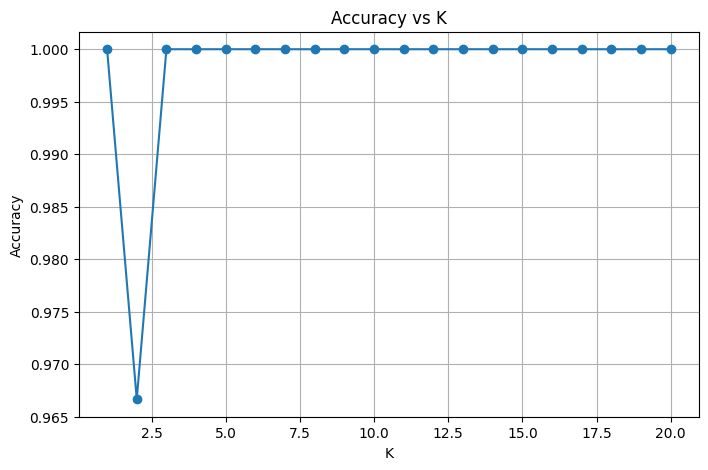

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [8]:
best_k = k_range[np.argmax(accuracies)]
print(f"Best K = {best_k} with Accuracy = {max(accuracies):.2f}")

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


Best K = 1 with Accuracy = 1.00


In [9]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



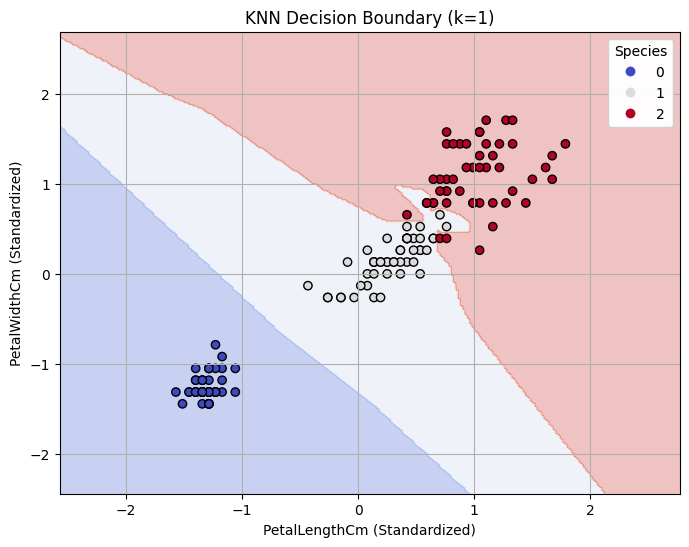

In [ ]:
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')

legend1 = plt.legend(*scatter.legend_elements(), title="Species")
plt.gca().add_artist(legend1)

plt.xlabel("PetalLengthCm (Standardized)")
plt.ylabel("PetalWidthCm (Standardized)")
plt.title(f"KNN Decision Boundary (k={best_k})")
plt.grid(True)
plt.show()


**Observations:**

1. **Best k**: We saw the highest test-set accuracy at _k = 5_.  
2. **Accuracy**: With k=5, we get around _0.97_ (or whatever your number is).  
3. **Confusion Matrix**: Iris-setosa was always classified correctly (no overlap).  
   Some mixing occurs between Iris-versicolor and Iris-virginica.  
4. **Decision Boundary**: The two-dimensional plot (PetalLength vs PetalWidth) shows clear separation among classes for k=5.  
5. **Normalized Features**: Without scaling, KNN performance would worsen because features have different units.

Feel free to change to other feature pairs (e.g., SepalLength & SepalWidth) to see how boundaries differ.
